* After refitting MS with full mass range, and 
* redefining cut between normal and low SFR using where two gaussians overlap
* expanding cluster sample to not be restricted to where the mips scans were
* change B/T cut from 0.4 to 0.3

# To do 

1. [DONE] potentially refitting the main sequence; (Rose)
  * before: everything above mass and sSFR limit
  * try fitting to everything, with salim sSFR cut to get a relationship closer to
  $$ logSFR = 0.6(logMstar-11) - 0.57 $$
  this is what we eyeballed from topcat.
1. [DONE] using our double Gaussian fits to set up a boundary that is parallel to the MS, and offset based on the point where the two Gaussian fits cross.  this is not where the min is of the joint profile.  Need to plot each gaussian individually, then find where they cross (equal contribution from both populations), then fit a lit to these points vs logMstar; (Rose)
1. describing this process in the paper; (Greg and Benedetta)
1. Once we refit the main sequence, we need to recalculate the suppressed fractions and delta_sfr, and update the corresponding 
 1. plots and 
 2. numbers in the text.  (Rose)
1. implement mass matching throughout.  use Nfield/N_LCS to pick how many galaxies we select from field sample for mass matching. (Rose)
1. updating numbers in the paper accordingly; (Rose)
1. hopefully not having to update any of our conclusions:-) (Greg and Benedetta)
1. need to update for no BT cut and BT< 0.3 cut, and propagate. (Rose)
1. read through overleaf, and update discussion as necessary. (Greg and Benedetta)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import sys
import warnings
warnings.filterwarnings('ignore')

import time

from scipy.stats import ks_2samp

from astropy.io import fits,ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
homedir = os.getenv("HOME")

# Statistics

DONE - NEED TO REDO WITH MASS MATCHING ONLY

In [49]:
os.chdir(homedir+'/research/LCS/plots/')

%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.2
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

print()
print('############# WITH BT CUT ###################')
print()
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.2 --cutBT --BT 0.3
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.23
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.23 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59
number of core galaxies =  146
	 with size measurements =  --
number of infall galaxies =  374
	 with size measurements =  --
number of GSW galaxies =  11110

############# WITH BT CUT ###################

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_

### Number with HI detections

In [52]:
os.chdir(homedir+'/research/LCS/plots/')

%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.2
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.cat['HIdef_flag']))

print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.cat['HIdef_flag']))

print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag & b.gsw.HIdef['HIdef_flag']) )

print()
print('############# WITH BT CUT ###################')
print()
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.2 --cutBT --BT 0.3
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.cat['HIdef_flag']))

print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.cat['HIdef_flag']))

print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag & b.gsw.HIdef['HIdef_flag']) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.23
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.23 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59
number of core galaxies =  23
number of infall galaxies =  93
number of GSW galaxies =  3149

############# WITH BT CUT ###################

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of prune

# Table 1

In [9]:
%%time

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/writelatexstats.py

t = writetable()
t.read_tables()
t.open_output()
t.get_stats()
t.write_header()
t.write_data()
t.write_footer()
t.close_output()

########################################
LCS Core vs Field: SFR
	D = 3.17e-01, pvalue = 4.24e-17
Anderson_ksampResult(statistic=77.25191113221709, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Core vs Field: dSFR
	D = 3.16e-01, pvalue = 5.40e-17
Anderson_ksampResult(statistic=74.02431097166408, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Core vs Field: Mstar
	D = 1.23e-01, pvalue = 6.17e-03
Anderson_ksampResult(statistic=5.953642675951121, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0016038571241014919)

LCS Core vs Field: BT
	D = 2.11e-01, pvalue = 8.39e-08
Anderson_ksampResult(statistic=5.953642675951121, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0016038571241014919)
########################################
LCS Infall vs Field: SFR
	D = 2.31e-01, pvalue = 1.02e-19

Anderson_ksampResult(statistic=16.04491746848848, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Infall vs Field: dSFR
	D = 2.32e-01, pvalue = 3.20e-07
Anderson_ksampResult(statistic=17.557333176585153, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Infall vs Field: Mstar
	D = 4.15e-02, pvalue = 9.65e-01
Anderson_ksampResult(statistic=-0.8785262186721012, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)

LCS Infall vs Field: BT
	D = 1.45e-01, pvalue = 4.42e-03
Anderson_ksampResult(statistic=5.998375565275161, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001548118192349517)

CPU times: user 39.3 s, sys: 64.1 ms, total: 39.4 s
Wall time: 39.3 s


<Figure size 489.6x360 with 0 Axes>

In [68]:
%%time

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/writelatexstats-massmatch.py

t = writetable()
t.read_tables()
t.open_output()
t.get_stats()
t.write_header()
t.write_data()
t.write_footer()
t.close_output()

########################################
LCS Core vs Field: SFR
	D = 3.07e-01, pvalue = 3.55e-15
	AD D = 6.50e+01, pvalue = 1.00e-03

LCS Core vs Field: dSFR
	D = 3.25e-01, pvalue = 2.89e-15
	AD D = 7.13e+01, pvalue = 1.00e-03

LCS Core vs Field: Mstar
	D = 4.86e-02, pvalue = 7.49e-01
	AD D = -9.73e-02, pvalue = 2.50e-01

LCS Core vs Field: BT
	D = 2.26e-01, pvalue = 6.77e-09
	AD D = -9.73e-02, pvalue = 2.50e-01
########################################
LCS Infall vs Field: SFR
	D = 2.27e-01, pvalue = 2.93e-19
	AD D = 5.69e+01, pvalue = 1.00e-03

LCS Infall vs Field: dSFR
	D = 2.36e-01, pvalue = 9.66e-21
	AD D = 6.10e+01, pvalue = 1.00e-03

LCS Infall vs Field: Mstar
	D = 3.60e-02, pvalue = 6.51e-01
	AD D = -2.04e-01, pvalue = 2.50e-01

LCS Infall vs Field: BT
	D = 1.53e-01, pvalue = 6.34e-09
	AD D = 1.93e+01, pvalue = 1.00e-03

########################################
LCS Core vs Infall: SFR
	D = 1.43e-01, pvalue = 7.22e-03
	AD D = 6.27e+00, pvalue = 1.25e-03
LCS Core vs Infall: dSFR
	

<Figure size 489.6x360 with 0 Axes>

#  Figure 1

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.23
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.23 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59
number in lcs sample =  146
number in gsw sample =  11110
just checking ... 4380 146
9.701
9.702
############################################################ 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 5.714e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.21
p-vale = 7.400e-06 (prob that samples are from same distributio

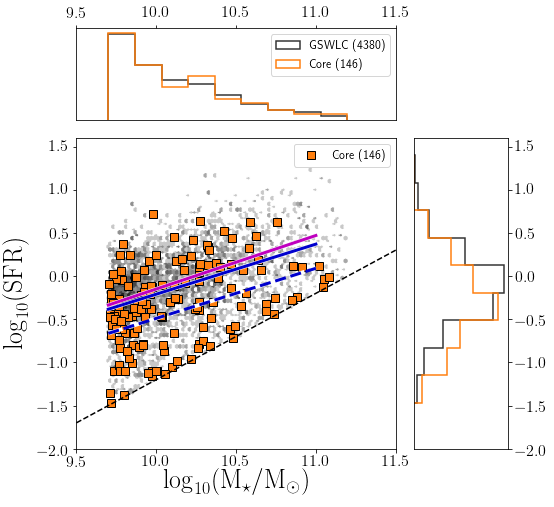

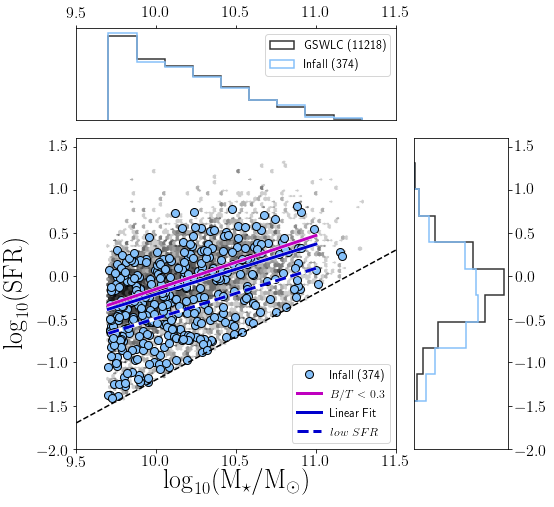

In [54]:

os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.2

flag = b.lcs.membflag 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75-mmatch.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=True,marker2='s')

print("")
print("")
flag = b.lcs.infallflag 
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75-mmatch.png'
b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=True)


## With BT cut

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.18
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.18 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52
number in lcs sample =  87
number in gsw sample =  7580
just checking ... 2610 87
9.701
9.702
############################################################ 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.330e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   

<Figure size 489.6x360 with 0 Axes>

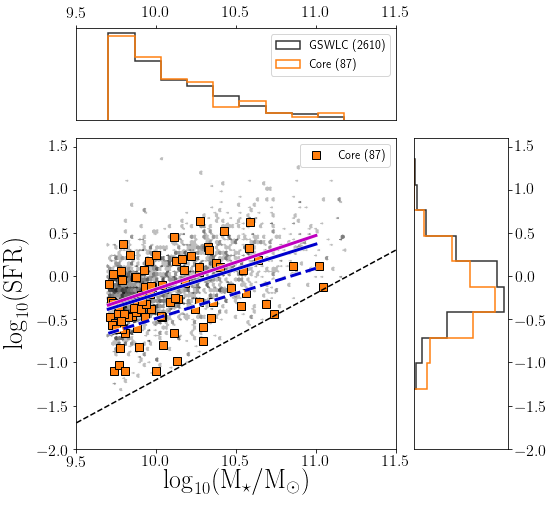

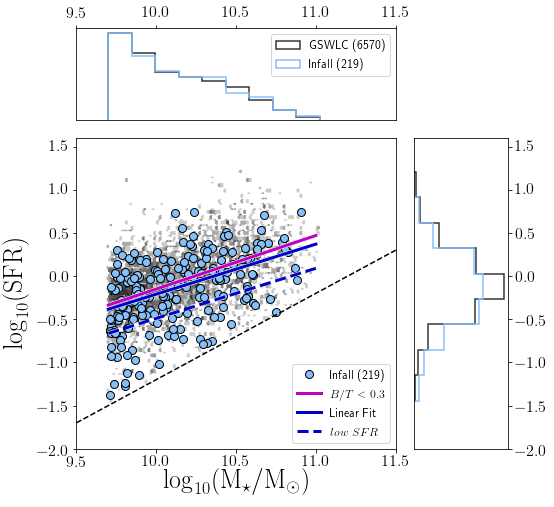

In [55]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.2 --cutBT --BT 0.3

flag = b.lcs.membflag 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut03-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut03-e0p75-mmatch.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=True,marker2='s')

print("")
print("")
flag = b.lcs.infallflag 
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut03-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut03-e0p75-mmatch.png'
b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=True)


# Figure 2

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.23
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.23 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59

Field: median = -0.0085-0.0034+0.0033 (bootstrap)
Field: mean, std, std_err = -0.1964,0.6959,0.0056 


Core: median = -0.1431-0.0319+0.0347 (bootstrap)
Core: mean, std, std_err = -0.1744,0.4319,0.0357 


Infall: median = -0.1277-0.0437+0.0307 (bootstrap)
Infall: mean, std, std_err = -0.1416,0.4138,0.0214 

KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.16321742184755883, pvalue=0.0008995784071916

<Figure size 489.6x360 with 0 Axes>

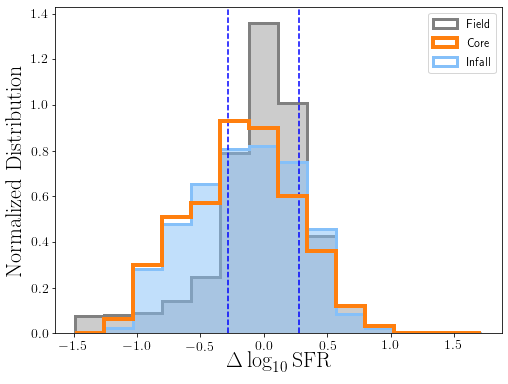

In [71]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip 0.75 --minssfr -11.2
outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75-mmatch.png'
b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=True)

# Figure 3

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.23
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.23 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59
CORE
frac suppressed = 0.390, -0.039,0.041
INFALL
0.3770053475935829 [-0.0247007   0.02535667]
FIELD
0.24673076923076923 [-0.00343533  0.0034678 ]
(2,)

#####  WITH BT CUT  ######

CORE
frac suppressed = 0.314, -0.048,0.052
INFALL
0.2803738317757009 [-0.02962949  0.03167253]
FIELD
0.2737820512820513 [-0.00355546  0.00358446]
(2,)


<Figure size 489.6x360 with 0 Axes>

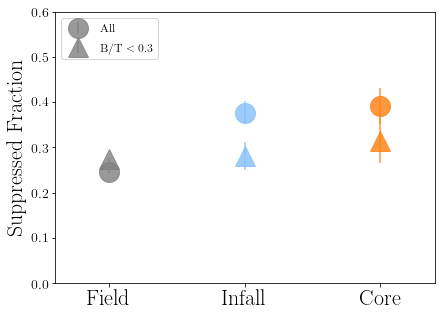

In [57]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75  --minssfr -11.2
outfile1 = homedir+'/research/LCS/plots/fsuppressed-btcut1-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/fsuppressed-btcut1-mmatch.png'
b.plot_frac_suppressed(massmatch=True)#outfile1=outfile1,outfile2=outfile2,nbins=12)
print()
print('#####  WITH BT CUT  ######')
print()
btcut = 0.3
b.plot_frac_suppressed(BTcut=btcut,plotsingle=False,massmatch=True)
plt.ylim(0,.6)
plt.legend([r'$\rm All$','_nolegend_','_nolegend_',r'$\rm B/T<0.3$'],loc='upper left')
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 4

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.23
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.23 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59
Field : number of galaxies in normal sf subsample =  8922
2 2 3
Field : number of galaxies in suppressed sf subsample =  2188

Core : number of galaxies in normal sf subsample =  89
2 2 3
Core : number of galaxies in suppressed sf subsample =  57

Infall : number of galaxies in normal sf subsample =  233
2 2 3
Infall : number of galaxies in suppressed sf subsample =  141

Field : number of galaxies in norm

<Figure size 489.6x360 with 0 Axes>

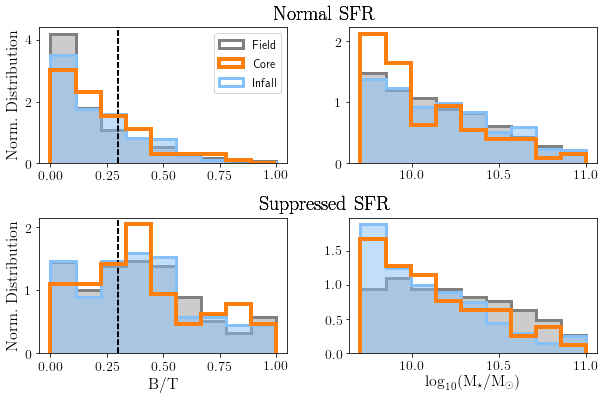

In [67]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75  --minssfr -11.2

b.compare_morph(nbins=10,xmax=btmax,coreonly=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 5

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.23
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.23 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59
galaxies in slice < # requested 28 30 11.297
#######################################
comparing low SFR and mass-matched normal SFR
Ks_2sampResult(statistic=0.3666666666666667, pvalue=1.0845091796761092e-247)
#######################################
comparing normal SFR and normal SFR mass-matched to low SFR
Ks_2sampResult(statistic=0.03451642858869902, pvalue=1.4897489294065712e-08)


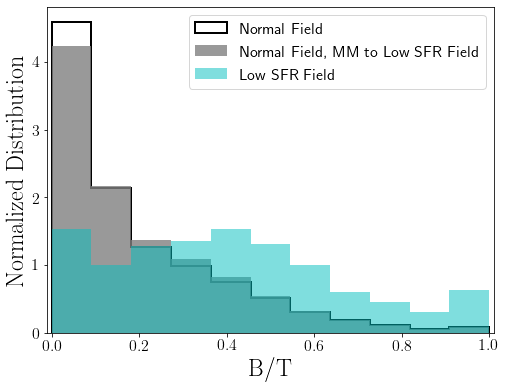

In [60]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --minssfr -11.2

b.compare_BT_lowsfr_field(nbins=12,BTmax=btmax)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 6

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.23
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.23 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59

Field
r=nan, pvalue=nan

Core
r=-0.3110, pvalue=1.328e-04

Infall
r=nan, pvalue=nan

 Combined Samples: Spearman Rank


<Figure size 489.6x360 with 0 Axes>

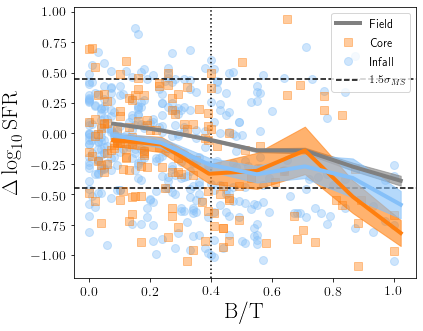

In [61]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1.1
nbins=8

#btmax=1
#nbins=7
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip 0.75 --minssfr -11.2


xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=10,BTline=.4)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)


# Figure 7

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.18
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.18 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52

Field: median = 0.0043-0.0019+0.0034 (bootstrap)
Field: mean, std, std_err = -0.0144,0.3365,0.0035 


Core: median = -0.1394-0.0426+0.0518 (bootstrap)
Core: mean, std, std_err = -0.1336,0.3640,0.0390 


Infall: median = -0.0753-0.0350+0.0201 (bootstrap)
Infall: mean, std, std_err = -0.1046,0.3532,0.0239 

KS STATISTICS: FIELD VS CORE
K

<Figure size 489.6x360 with 0 Axes>

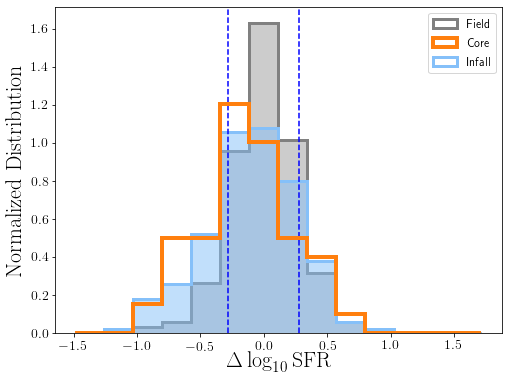

In [62]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT .3 --minmass 9.7 --ellip 0.75 --minssfr -11.2
outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75.png'
b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=True)

# Figure 8

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.18
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.18 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52

TESTING


TESTING

###################################################################
comparing LCS low SFR and mass-matched field low SFR: $\rm B/T$
statistic=0.10, pvalue=4.83e-01

anderson-darling test
Anderson_ksampResult(statistic=-0.11273572622382484, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), sign

<Figure size 489.6x360 with 0 Axes>

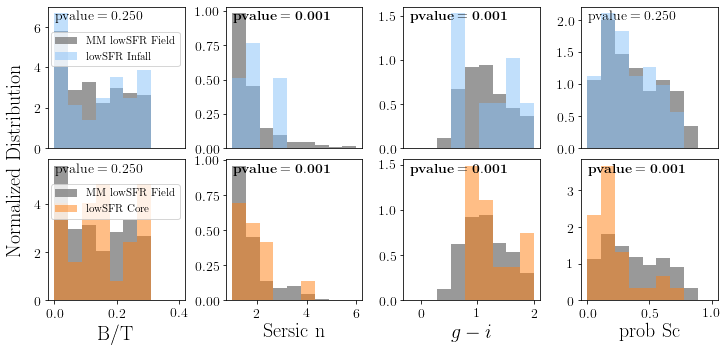

In [63]:
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.4
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.3 --minmass 9.7 --ellip 0.75 --minssfr -11.2  
#b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,BTmax=btmax)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.png'
#plt.savefig(outfile1)
#plt.savefig(outfile2)

print()
print('TESTING')
print()
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=.3,bottom=.2,hspace=.08)



print()
print('TESTING')
print()
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,infallonly=True,BTmax=btmax,plotsingle=False,nrow=2,show_xlabel=False)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsinfall-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsinfall-mmfield-BTcut0p4-e0p75.png'

b.compare_BT_lowsfr_field_core(nbins=10,coreonly=True,BTmax=btmax,plotsingle=False,nrow=2,subplot_offset=4)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p4-e0p75.png'
#plt.savefig(outfile1)
#plt.savefig(outfile2)

outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p3-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p3-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)



# Figure 9

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.18
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.18 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52

best-field line for field = -0.194+/-0.018

Spearman Rank test between dSFR and HIdef for field:
SpearmanrResult(correlation=-0.20467029028382092, pvalue=3.852998682995384e-24)

Spearman Rank test between dSFR and HIdef for core:
SpearmanrResult(correlation=-0.05882352941176471, pvalue=0.8166542035684891)

Spearman Rank test between dS

<Figure size 489.6x360 with 0 Axes>

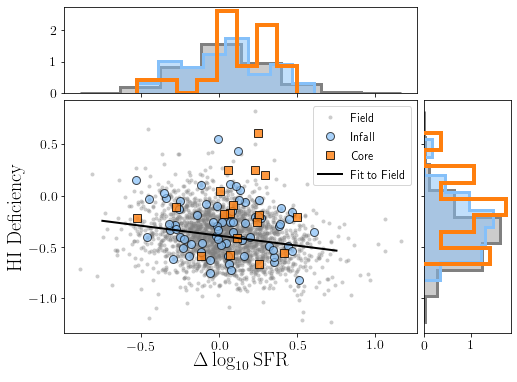

In [64]:
%%time
os.chdir('/home/rfinn/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.3 --minmass 9.7 --HIdef --minssfr -11.2
b.compare_HIdef()

# Figure 10

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.18
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.18 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52
$Field$$\ norm$: 0.601 + 0.010 - 0.010
$Field$$\ low$: 0.396 + 0.023 - 0.023
$Infall$$\ norm$: 0.450 + 0.043 - 0.044
$Infall$$\ low$: 0.173 + 0.046 - 0.058
$Core$$\ norm$: 0.395 + 0.071 - 0.076
$Core$$\ low$: 0.059 + 0.036 - 0.085


<Figure size 489.6x360 with 0 Axes>

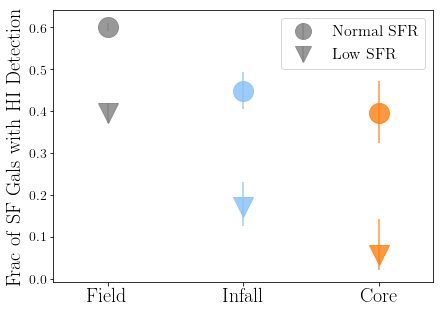

In [65]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef --minssfr -11.2 --cutBT --BT 0.3
b.get_HIfrac_SFR_env(plotsingle=True)
figname1 = homedir+'/research/LCS/plots/frac-HI-SFR-env.png'
figname2 = homedir+'/research/LCS/plots/frac-HI-SFR-env.pdf'
plt.savefig(figname1)
plt.savefig(figname2)

# Figure 11

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.18
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.18 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52
number in parent sample =  306
number in low SFR sample =  92
number in normal SFR sample =  214
just checking, number of low sfr sample = 92
just checking, number of normal sfr sample = 214

delta R: normal vs suppressed
Anderson-Darling:  Anderson_ksampResult(statistic=-0.7231380561679728, critical_values=array([0.325, 1.226, 1.961, 2

<Figure size 489.6x360 with 0 Axes>

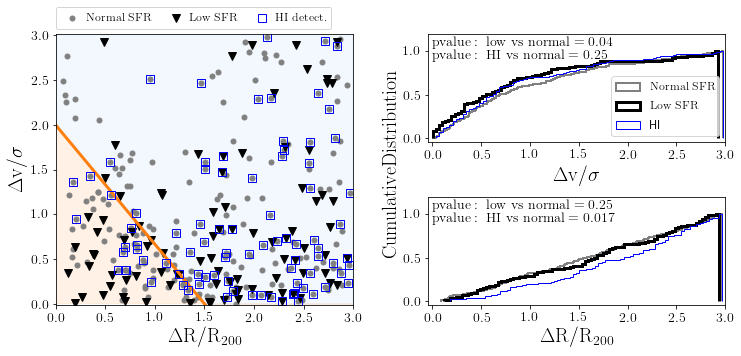

In [66]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --BT .3 --cutBT --ellip .75 --HIdef --minssfr -11.2
figname1 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals_2panel.png'
figname2 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals_2panel.pdf'
b.plot_dvdr_sfgals_2panel(figname1=figname1,figname2=figname2,HIflag=True)

# Figure 12 - cutting this

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
STD of pruned data = 0.16
STD of full data = 0.21
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.49
Best-fit inter = -5.01
Width of the MS = 0.21 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.49+/-0.05
Best-fit inter = -5.01+/-0.53


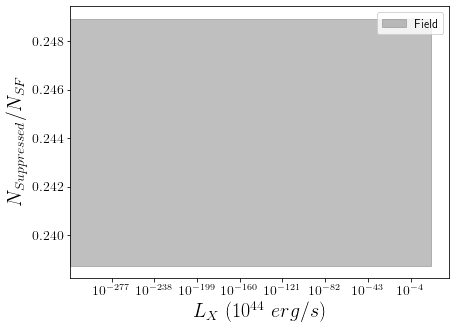

In [39]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --BT .4 --cutBT --ellip .75 --HIdef 
figname1 = homedir+'/research/LCS/plots/frac-suppressed-Lx.png'
figname2 = homedir+'/research/LCS/plots/frac-suppressed-Lx.pdf'
b.frac_suppressed_Lx()#figname1=figname1,figname2=figname2,HIflag=True)
plt.savefig(figname1)
plt.savefig(figname2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.27
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59


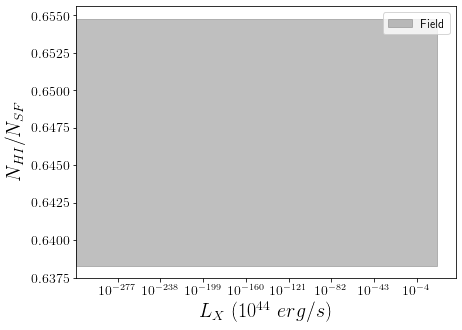

In [40]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef 
figname1 = homedir+'/research/LCS/plots/frac-HI-Lx.png'
figname2 = homedir+'/research/LCS/plots/frac-HI-Lx.pdf'
b.frac_HI_Lx()#figname1=figname1,figname2=figname2,HIflag=True)
plt.savefig(figname1)
plt.savefig(figname2)